<a href="https://colab.research.google.com/github/JustKidding2K/APP-CQ18-Project/blob/main/APP_CQ18_Project_Nh%C3%B3m_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Phân loại chữ số viết tay MNIST bằng Neural Network
Đồ án Lập trình song song ứng dụng - CQ 2018 - Nhóm 8

## Thông tin nhóm
### STT: Nhóm 8

### Thành viên:
1. 18120279 - Phạm Tuấn Anh - [Microvolts1](https://github.com/Microvolts1)
2. 18120212 - Huỳnh Long Nam - [JustKidding2K](https://github.com/JustKidding2K)
3. 18120280 - Trần Đức Anh - [anhhtrduc](https://github.com/anhhtrduc)

# Mô tả ứng dụng:






### **Mô tả tổng quan:**

- Với sự phát triển của học máy, đặc biệt là Neural Network, nhiều vấn đề của cuộc sống đã được tự động hóa
- Các bài toán có thể kể đến phân loại, nhận dạng, dự đoán, ... 
<center>
<img src='https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png'>
<figcaption>Nhận dạng chữ số viết tay </figcaption>
</center>

<center>
<img src='https://cdn.baogiaothong.vn/upload/images/2022-1/article_img/2022-01-19/img-bgt-2021-vi-pham-toc-do-1-1642596526-width1280height720.jpg'>
<figcaption>Nhận dạng biển số</figcaption>
</center>

### **Giới thiệu và khám phá dữ liệu:**

- Bộ dữ liệu MNIST(Modified National Institute of Standards and Technology) là một bộ dữ liệu lớn chứa các chữ số viết tay thường được dùng trong việc huấn luyện các hệ thống xử lí hình ảnh. Ngoài ra, bộ dữ liệu này cũng được sử dụng rộng rãi để huấn luyện và kiểm thử trong lĩnh vực học máy.
-Trong bài toán này, chúng ta sử dụng 60,000 ảnh xám vuông nhỏ có kích thước 28x28 pixel gồm các chữ số đơn viết tay từ 0 đến 9. 
- Nhiệm vụ của chúng ta là đi phân loại một hình ảnh cho trước của một chữ số viết tay vào một trong 10 lớp biểu thị các số nguyên từ 0 đến 9. 
- Đây là một tập dữ liệu được sử dụng rộng rãi và đã được giải quyết rất hiệu quả. Các mô hình hoạt động hiệu quả nhất là Deep Learning CNN đạt độ chính xác phân loại trên 99%, với tỉ lệ lỗi từ 0.4% đến 0.2% trên tập test.

<br>

Train:
- Input: 50,000 ảnh xám vuông nhỏ có kích thước 28x28 pixel gồm các chữ số đơn viết tay từ 0 đến 9. 

- Output: Mô hình phân lớp chữ số viết tay

Test:
- Input: 10,000 ảnh xám vuông nhỏ có kích thước 28x28 pixel gồm các chữ số đơn viết tay từ 0 đến 9.

- Output: xác suất rơi vào các lớp của ảnh


MINH HỌA BỘ DỮ LIỆU
![picture](https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png)


# Giải quyết bài toán

## Cài đặt tuần tự

### Base class Layer
- Đây sẽ là Base layer mà các Layer sẽ kế thừa. Chứa các thuộc tính đơn giản là input từ layer khác và output truyền đi. Kèm với phương thức foward và backward propagation.

In [ ]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass

### CNN Layer

#### Forward propagation

- Thao tác forward, ta trượt filter $F$ dọc theo input $X$ và thực hiện phép nhân ma trận, kích thước của input và filter, bước nhảy (stride), và phân viền(padding) sẽ quyết định kích thước của output. 

- Hình bên dưới mô phỏng lại thao tác tích chập với Input (3x3), Filter(2x2), Stride=1, không có padding
<img src="https://miro.medium.com/max/1400/1*K7dINARev0NUB-HWp9mbwA.gif">

- Với mỗi kênh màu của input, mỗi filter của layer sẽ sinh ra một ma trận output khác nhau. Do đó, output của CNN thường có kích thước rất lớn. 

#### Backward propagation


---


<img src="https://miro.medium.com/max/1400/1*w8VkZ50foXWTmoXDDnr8tg.png">


Giả sử ta có $X$, $F$ và $\frac{\partial{L}}{\partial{O}}$ lần lượt là input, filter và gradient độ lỗi được lan truyền từ các layer phía sau. 

Với $O = X \circledast F$:

$O_{11} = X_{11}F_{11} + X_{12}F_{12} + X_{21}F_{21} + X_{22}F_{22}$

$O_{12} = X_{12}F_{11} + X_{13}F_{12} + X_{22}F_{21} + X_{23}F_{23}$

$O_{21} = X_{21}F_{11} + X_{22}F_{12} + X_{31}F_{21} + X_{32}F_{22}$

$O_{22} = X_{22}F_{11} + X_{23}F_{12} + X_{32}F_{21} + X_{33}F_{22}$

---

Xét $O_{11} = X_{11}F_{11} + X_{12}F_{12} + X_{21}F_{21} + X_{22}F_{22}$

**Ta cần tính $\frac{\partial{L}}{\partial{F}}$ và $\frac{\partial{L}}{\partial{X}}$.**

Sử dụng quy tắc đạo hàm mắc xích, ta có:

- $ \frac{\partial{L}}{\partial{F}} = \frac{\partial{L}}{\partial{O}}\cdot\frac{\partial{O}}{\partial{F}}$.



Ta tính đạo hàm cục bộ  $\frac{\partial{O}}{\partial{F}}$

$\frac{\partial{O_{11}}}{\partial{F_{11}}} = X_{11} ; \frac{\partial{O_{12}}}{\partial{F_{11}}} = X_{12} ; \frac{\partial{O_{21}}}{\partial{F_{11}}} = X_{21}; \frac{\partial{O_{22}}}{\partial{F_{11}}} = X_{22} $

Tương tự với $O_{12}, O_{21}, O_{22}$.

Đạo hàm của $L$ theo $F$

$\frac{\partial{L}}{\partial{F_{11}}} = \frac{\partial{L}}{\partial{O_{11}}}\frac{\partial{O_{11}}}{\partial{F_{11}}} + \frac{\partial{L}}{\partial{O_{12}}}\frac{\partial{O_{12}}}{\partial{F_{11}}} + \frac{\partial{L}}{\partial{O_{21}}}\frac{\partial{O_{21}}}{\partial{F_{11}}} + \frac{\partial{L}}{\partial{O_{22}}}\frac{\partial{O_{22}}}{\partial{F_{11}}}$

$ \qquad = \frac{\partial{L}}{\partial{O_{11}}}X_{11} + \frac{\partial{L}}{\partial{O_{12}}}X_{12} + \frac{\partial{L}}{\partial{O_{21}}}X_{21} + \frac{\partial{L}}{\partial{O_{22}}}X_{22}$

$ \frac{\partial{L}}{\partial{F_{12}}} = \frac{\partial{L}}{\partial{O_{11}}}X_{12} + \frac{\partial{L}}{\partial{O_{12}}}X_{13} + \frac{\partial{L}}{\partial{O_{22}}}X_{22} + \frac{\partial{L}}{\partial{O_{22}}}X_{23}$

$ \frac{\partial{L}}{\partial{F_{21}}} = \frac{\partial{L}}{\partial{O_{11}}}X_{21} + \frac{\partial{L}}{\partial{O_{12}}}X_{22} + \frac{\partial{L}}{\partial{O_{21}}}X_{31} + \frac{\partial{L}}{\partial{O_{22}}}X_{32}$

$ \frac{\partial{L}}{\partial{F_{22}}} = \frac{\partial{L}}{\partial{O_{11}}}X_{22} + \frac{\partial{L}}{\partial{O_{12}}}X_{23} + \frac{\partial{L}}{\partial{O_{21}}}X_{32} + \frac{\partial{L}}{\partial{O_{22}}}X_{33}$

**Chính là kết quả của phép CORRELATE $\frac{\partial{L}}{\partial{F}} = X \circledast \frac{\partial{L}}{\partial{O}}$**

<img src="https://miro.medium.com/max/1400/1*Be-DgX7wlxV5bMx1vtZVAg.png">

Đạo hàm của $L$ theo $X$

$\frac{\partial{L}}{\partial{X_{11}}} = \frac{\partial{L}}{\partial{O_{11}}}F_{11}$

$\frac{\partial{L}}{\partial{X_{12}}} = \frac{\partial{L}}{\partial{O_{11}}}F_{12} + \frac{\partial{L}}{\partial{O_{12}}}F_{11}$

$\frac{\partial{L}}{\partial{X_{13}}} = \frac{\partial{L}}{\partial{O_{12}}}F_{12}$

$\frac{\partial{L}}{\partial{X_{21}}} = \frac{\partial{L}}{\partial{O_{11}}}F_{21} +  \frac{\partial{L}}{\partial{O_{21}}}F_{11}$

$\frac{\partial{L}}{\partial{X_{22}}} = \frac{\partial{L}}{\partial{O_{11}}}F_{22} + \frac{\partial{L}}{\partial{O_{12}}}F_{21} + \frac{\partial{L}}{\partial{O_{21}}}F_{12} + \frac{\partial{L}}{\partial{O_{22}}}F_{11}$

$\frac{\partial{L}}{\partial{X_{23}}} = \frac{\partial{L}}{\partial{O_{12}}}F_{22} + \frac{\partial{L}}{\partial{O_{22}}}F_{12}$

$\frac{\partial{L}}{\partial{X_{31}}} = \frac{\partial{L}}{\partial{O_{21}}}F_{21}$

$\frac{\partial{L}}{\partial{X_{32}}} = \frac{\partial{L}}{\partial{O_{21}}}F_{22} + \frac{\partial{L}}{\partial{O_{22}}}F_{21}$

$\frac{\partial{L}}{\partial{X_{33}}} = \frac{\partial{L}}{\partial{O_{22}}}F_{22}$

**Chính là kết quả của phép CONVOLUTION $\frac{\partial{L}}{\partial{X}} = rot 180^{\circ} F_{full}\circledast  \frac{\partial{L}}{\partial{O}}$**

<img src="https://miro.medium.com/max/1400/1*ZLFncsvkFZ-n5tTLuBcaqA.png">



#### Coding

In [ ]:
def correlate(input, kernel, stride=1, padding='valid'):

  h_i, w_i  = input.shape
  h_k, w_k = kernel.shape

  s_h = stride
  s_w = stride

  if padding == 'valid':
    p_h = 0
    p_w = 0

  if padding == 'full':
    p_h= h_k - 1
    p_w= w_k -1

  input = np.pad(input, [(p_h, p_h), (p_w, p_w)],
                    mode='constant', constant_values=0)

  h_out = int((h_i - h_k + 2*p_h)/stride + 1)
  w_out = int((w_i - w_k + 2*p_w)/stride + 1)

  output_conv = np.zeros((h_out, w_out))

  for i in range(h_out):
        for j in range(w_out):
                output_conv[i, j] = np.sum(np.multiply(
                        input[
                            i*stride:h_k+i*stride,
                            j*stride:w_k+j*stride],
                        kernel), axis=(0,1))
  return output_conv

In [ ]:
def correlate_batch(input, kernel, stride=1, padding='valid'):

  m_i,h_i, w_i  = input.shape
  h_k, w_k = kernel.shape

  s_h = stride
  s_w = stride

  if padding == 'valid':
    p_h = 0
    p_w = 0

  if padding == 'full':
    p_h= h_k - 1
    p_w= w_k -1

  input = np.pad(input, [(p_h, p_h), (p_w, p_w)],
                    mode='constant', constant_values=0)

  h_out = int((h_i - h_k + 2*p_h)/stride + 1)
  w_out = int((w_i - w_k + 2*p_w)/stride + 1)

  output_conv = np.zeros((h_out, w_out))

  for i in range(h_out):
        for j in range(w_out):
                output_conv[i, j] = np.sum(np.multiply(
                        input[
                            i*stride:h_k+i*stride,
                            j*stride:w_k+j*stride],
                        kernel), axis=(0,1))
  return output_conv

In [ ]:
class Convolutional(Layer): #CNN su dung thu vien scipy -> signal.correlate2d
    def __init__(self, input_shape, kernel_size, depth):
        '''
        input_shape: A tupple contain following:
        + input_depth: number of color channels
        + input_height: the height of input
        + input_width: the width of input

        kernel_size: size of kernel matrix: ex: 3 -> 3x3, 5 -> 5x5,...
        depth: number of different kernel, also the depth of output.

        '''
        
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        np.random.seed(0)
        self.kernels = np.random.randn(*self.kernels_shape)
        np.random.seed(0)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")

        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient

In [ ]:
class CNNLayer(Layer): #CNN su dung ham correlate o tren
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        np.random.seed(0)
        self.kernels = np.random.randn(*self.kernels_shape)
        np.random.seed(0)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += correlate(self.input[j], self.kernels[i, j], 1, "valid")
                #self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)
        kernels_rot_180=np.rot90(self.kernels,2)
        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = correlate(self.input[j], output_gradient[i], 1, "valid")
                input_gradient[j] += correlate(output_gradient[i], kernels_rot_180[i, j], 1, "full")
                #kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                #input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")

        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient

### Pooling Layer

#### Max pooling

- Là lấy giá trị lớn nhất với khi kernel di chuyển trên input:

<img src='https://i1.wp.com/nttuan8.com/wp-content/uploads/2019/03/pooling_2.jpg?resize=410%2C302&ssl=1'>

#### Forward propagation

- Với forward ta chỉ việc di chuyển kernel có kích thước k và với bước di chuyển stride nhất định. Thông thường là k = 2 và stride = 2 như minh họa trên.

#### Backward propagation

- Khi ta max pooling thì ta không có bất kì trọng số nào cả, thứ ta cần backward là kích thước input trước khi pooling. Vì thế ta cần lưu lại index của các giá trị max và các vị trí còn lại thì chèn giá trị 0.

<img src='https://mukulrathi.com/static/4e96c9ac277c5380d63b470bb3b82f3b/27b8e/pool-backward.png'>

#### Coding

In [ ]:
class MaxPoolingLayer(Layer):
  def __init__(self, input_shape, kernel_size, stride):
      #forward variable
      input_depth, input_height, input_width = input_shape
      self.depth = input_depth
      self.stride = stride
      self.input_shape = input_shape
      self.output_shape = (self.depth, int((input_height - kernel_size) / stride) + 1, int((input_width - kernel_size) / stride) + 1)
      self.kernels_size = kernel_size

      #backward variable
      self.prev_input = np.zeros(input_shape) # array have shape before pooling


  def get_pools(self, input, depth):
      # To store individual pools
      pools = []
      # Iterate over all row blocks (single block has `stride` rows)
      for i in np.arange(input.shape[0], step=self.stride):
          # Iterate over all column blocks (single block has `stride` columns)
          for j in np.arange(input.shape[1], step=self.stride):
            
              # Extract the current pool
              mat = input[i:i+self.kernels_size, j:j+self.kernels_size]
            
              # Make sure it's rectangular - has the shape identical to the pool size
              if mat.shape == (self.kernels_size, self.kernels_size):
                 # Append to the list of pools output.
                 pools.append(np.max(mat))
                 # store position in prev_input for backward propagation.
                 idx = np.where(input[i:i+self.kernels_size,j:j+self.kernels_size] == np.max(mat)) # find index where max element store in.
                 self.prev_input[depth][i + idx[0][0],j + idx[1][0]] = input[i + idx[0][0],j + idx[1][0]] # store in prev_input.
                     
      # Return all pools as a Numpy array with shape of output.
      tgt_shape = (self.output_shape[1], self.output_shape[2])
      return np.array(pools).reshape(tgt_shape)

  def max_pooling(self, input):
      # Total number of pools
      num_pools = input.shape[1]
      # Shape of the matrix after pooling - Square root of the number of pools
      # Cast it to int, as Numpy will return it as float
      # For example -> np.sqrt(16) = 4.0 -> int(4.0) = 4
      tgt_shape = (self.output_shape[1], self.output_shape[2])
      # To store the max values
      pooled = []
      
      # Iterate over all pools
      for pool in input:
          # Append the max value only
          pooled.append(np.max(pool))
          
      # Reshape to target shape
      return np.array(pooled).reshape(tgt_shape)

  def forward(self, input):
      self.input = input
      self.output = np.zeros(self.output_shape)
      for i in range(self.depth):
              # pooled = self.get_pools(self.input[i], i)
              self.output[i] = self.get_pools(self.input[i], i)

      return self.output
  
  def backward(self, output_gradient, learning_rate):
      #roll back shape of input 
      return self.prev_input

      

### Flatten Layer

Output của CNN có dạng ma trận (2 chiều), ta cần phải "trải phẳng" ra trước khi đưa qua lớp Fully Connected. Do đó, ta cần một layer gọi là Reshape để thay đổi shape sang 1 chiều.

In [ ]:
class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, input):
        return np.reshape(input, self.output_shape)

    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)

### Fully Connected Layer

- Đây là layer cơ bản nhất: Mỗi input nơ-ron sẽ nối hết tới tất cả output nơ-ron ở layer kế tiếp nó.

<img src='https://miro.medium.com/max/876/1*jOObSF4HAB5VL5wO6petqA.png'>

#### Forward propagation

- Việc lan tuyền tiến(Forward propagation) thực hiện như sau:

<img src='https://miro.medium.com/max/674/0*Ec9fiXkNOoA5Z2v5.png'>

- Với việc chúng ta sử dụng mà trận thì chúng ta có tích vô hướng (dot product) như sau:

1. Ta có các ma trận:


<img src='https://miro.medium.com/max/1400/0*qTBPwmzIjBOGKpXH.png'>


2. Từ đó ta có được:


<img src='https://miro.medium.com/max/506/0*FsJQ82GmKlV2X22z.png'>

#### Backward propagation


- Giả sử chúng ta đã có $Y$ và $E$, từ đó ta tính toán được $\frac{\partial{E}}{\partial{Y}}$ hay đạo hàm độ lỗi với output. Tiếp đến ta cần tính toán 2 thứ:
1. Đạo hàm độ lỗi $E$ với từng tham số: $\frac{\partial{E}}{\partial{W}}$, $\frac{\partial{E}}{\partial{B}}$

2. Đạo hàm độ lỗi $E$ với input $X$: $\frac{\partial{E}}{\partial{X}}$ 

1. Đầu tiên là tính $\frac{\partial{E}}{\partial{W}}$, ma trận này nên cùng kích thước với ma trận $W$ với kích thước $i \times j$. $i$ là số lượng input nơ-ron và $j$ là số lượng output nơ-ron.

<img src='https://miro.medium.com/max/802/0*PiVZ-czmfvBaAFSe.png'>

- Sử dụng chain rule, ta có:

<img src='https://miro.medium.com/max/1242/0*cKYlxf87ZwkKtnrt.png'>

- Cuối cùng ta rút ra được: 

<img src='https://miro.medium.com/max/1042/0*sEeQVqIapym6O9VH.png'>

- Tiếp đến ta tính $\frac{\partial{E}}{\partial{B}}$


<img src='https://miro.medium.com/max/1032/0*sJVXt05jf2cgd_Ys.png'>

- Ở đây ta tiếp tục sử dụng chain rule:

<img src='https://miro.medium.com/max/1114/0*ud43sxuKpgPo9Rlo.png'>


- Cuối cùng rút ra được là: 

<img src='https://miro.medium.com/max/1046/0*sovSd27ja1_7R2yU.png'>

2. Tính toán cho $\frac{\partial{E}}{\partial{X}}$

<img src='https://miro.medium.com/max/1052/0*nPzn6Jgv-P0wxUA7.png'>

- Đầu tiên là chain rule:

<img src='https://miro.medium.com/max/1118/0*x6uE01GkG3NKLNQp.png'>


- Cuối cùng rút ra được là: 



<img src='https://miro.medium.com/max/1400/0*JWCzIdtJVTeQ_PG8.png'>

#### Coding

- Ta có được các công thức để áp dụng như sau:

<img src='https://miro.medium.com/max/492/0*HlI8qj8qZqGIWBrk.png'>

- Và giờ ta code fully connected layer như dưới

In [ ]:
class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

### Activation Layer

- Giả sử ta có hai hàm kích hoạt $f$ và $f'$ tương ứng cho việc forward và backward.

<img src='https://miro.medium.com/max/770/1*xl7UacJfCUAk_KqX3WI49Q.png'>

#### Forward propagation

- Là hàm kích hoạt cho từng phần tử trong ma trận input.

<img src='https://miro.medium.com/max/906/0*Aw9jCvpliMjaO00W.png'>

#### Backward propagation

- Giả sử đã có $\frac{\partial{E}}{\partial{Y}}$, giờ thì ta tính $\frac{\partial{E}}{\partial{X}}$ cho layer này.

<img src='https://miro.medium.com/max/1400/0*9aXZPVNHXXpz1vd9.png'>


- Lưu ý dòng cuối biểu tượng $\odot$ ám chỉ phép toán [Hamada product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) nghĩa là ma trận cùng kích thước nhân tương ứng các phần tử với nhau. (VD: ma trận $A$,$B$ thì nhân tương ứng là $a_{ij} \times b_{ij}$)

#### Coding

In [ ]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [ ]:
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

### Softmax layer


#### Forward propagation

- Công thức tổng quát của softmax như sau:


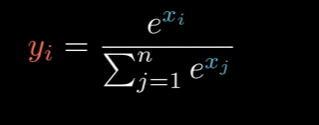

#### Backward propagation

- Về cơ bản vẫn giống như các layer khác. Ta giả sử có đạo hàm độ lỗi với output, từ đó ta cần tìm đạo hàm độ lỗi với input.

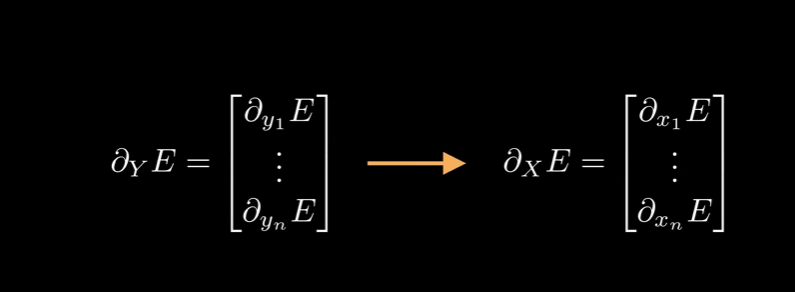

- Sử dụng chain rule cho từng phần tử $x_k$

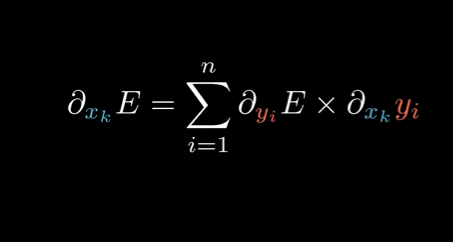

- Sử dụng công thức đạo hàm $(\frac{u}{v})' = \frac{(u'v-uv')}{v^2}$. Ta có:

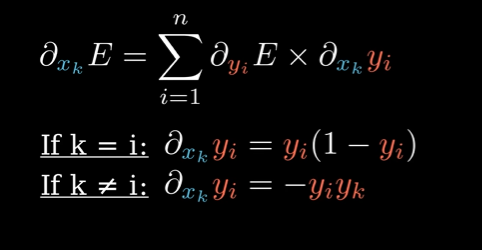

- Ta có thể viết đạo hàm độ lỗi theo input dưới dạng ma trận như sau:

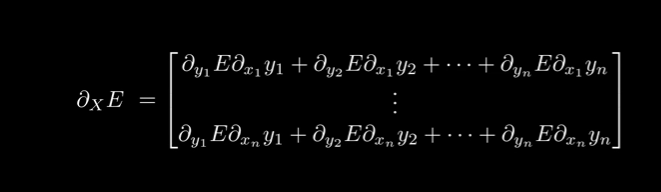

- Sau đó phân tích thành:


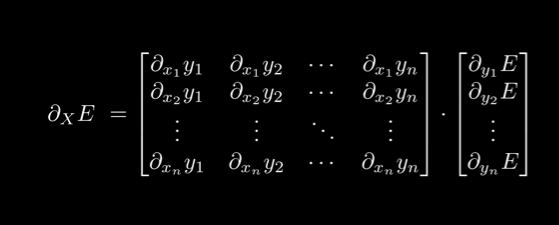

- và từ đó thay vào:


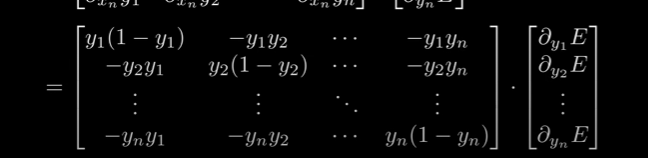

- Nếu để ý từng dòng thì ta có thể thấy rằng dòng 1 thì tất cả luôn có chung nhân tử $y_1$. Tương tự dòng kế tiếp, nên từ đó ta có thể viết lại như sau:

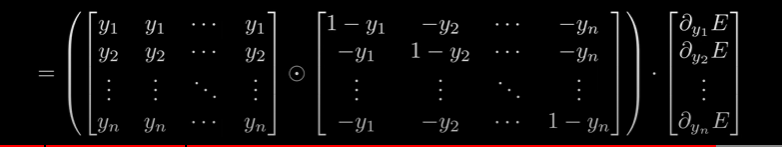

  biểu tượng $\odot$ ám chỉ phép toán [Hamada product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) hay element-wise

- Và để ý ma trận thứ 2 dường như hàng chéo bị trừ bởi 1 và phần còn lại là 0. Đây là phép trừ ma trận giữa ma trận đơn vị và ma trận chuyển vị của ma trận thứ 1:


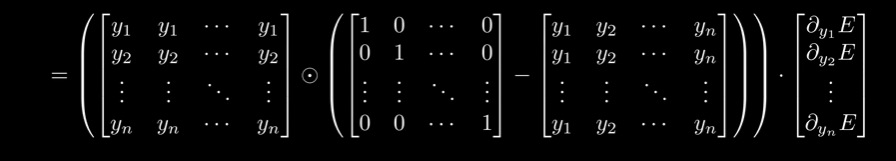

- Kí hiệu ma trận đầu tiên là $M$ thì ta có thể viết gọn như sau:

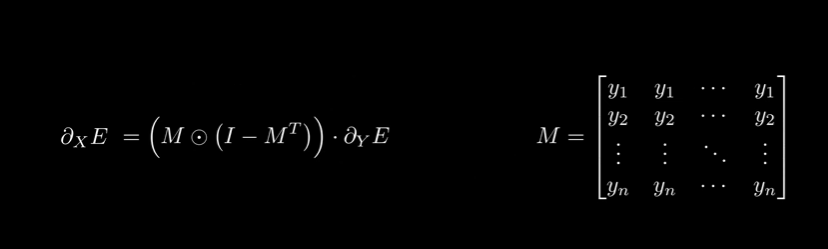

#### Coding

In [ ]:
class Softmax(Layer):
    def forward(self, input):
        self.input = input
        tmp = np.exp(self.input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        # This version is faster than the one presented in the video
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)
        # Original formula:
        # tmp = np.tile(self.output, n)
        # return np.dot(tmp * (np.identity(n) - np.transpose(tmp)), output_gradient)

### Loss function

#### Tính toán layer cuối cùng nhất

- Với các layer trước thì luôn có $\frac{\partial{E}}{\partial{Y}}$ tính được từ layer sau. Nhưng với layer out cuối cùng nhất thì lấy ở đâu?

- Đáp án chính là việc ta tính toán từ hàm mất mát. Một trong số đó là hàm MSE - Mean Square Error. 

<img src='https://miro.medium.com/max/726/0*CuLKvZnTvjT1d6KJ.png'>

- Đạo hàm ta có:


<img src='https://miro.medium.com/max/1176/0*2ggVYLPNH-vIJir6.png'>

#### Binary Cross Entropy Loss.

- Là 1 layer output đưa ra dự đoán $Y^*$, mỗi $y_i \in Y^*$ với $y_i \in {\{0,1\}}$ so với giá trị thực là $Y$. Đây là kiểu mã hóa hay dùng cho các bài toán phân lớp.(VD: nhận dạng chữ viết tay từ số 0-9 sẽ làm các $y_i$ tại $i$ tương ứng có giá trị là 1, còn lại là 0).

- Công thức toán học để tính sự mất mát(loss) là: 

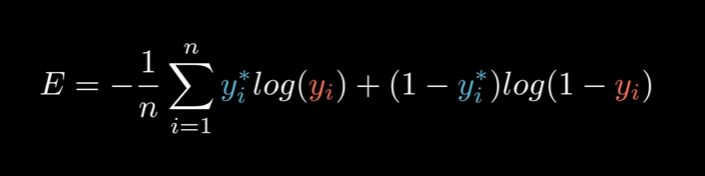

#### Coding

In [ ]:
#Loss function 
def reshape_labels(prediction,labels):
    label_reshape = np.zeros(prediction.shape)
    for i in range(0,len(prediction)):
        label_reshape[i][labels[i]] = 1
    return(label_reshape)

def loss_SSE(prediction, labels):
    loss_SSE = []
    labels_reshape = reshape_labels(prediction, labels)
    for i in range(0,len(prediction)):
        loss_SSE.append(np.sum((prediction[i] - labels_reshape[i])**2))
    return(np.mean(loss_SSE))

def grad_loss(prediction, labels):
    label_reshape = reshape_labels(prediction, labels)
    grad_loss_out = []
    for i in range(0,len(prediction)):
        grad_loss_out.append(2*(prediction[i] - label_reshape[i]))
    return(np.array(grad_loss_out))
    
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def grad_softmax(x):
    '''Compute the gradient of the output layer over each z, Output = softmax(z)
    Input -> Output layer you waht to do the gradient of softmax over
    Outpu -> Matrix of the gradient of each outpu w.r.t each z
    '''
    grad_softmax =[]
    for k in range(0,len(x)):
        jacobian =np.empty((x.shape[-1],x.shape[-1]))
        for i in range(0, jacobian.shape[0]):
            for j in range(0, jacobian.shape[1]):
                if i == j:
                    jacobian[i][j] =  x[k][i] * (1 - x[k][j])
                else:
                    jacobian[i][j] =  x[k][i] * (0 - x[k][j])
        grad_softmax.append(jacobian)            
    return(np.array(grad_softmax))   


    #Step 1 - Calculate the Gradient of the loss w.r.t the outputs
    grad_loss_outputs = grad_loss(prediction, labels)
    
    #Step 2 - Calculate the Gradient of each output w.r.t each z, where output[i] = softmax(z[i])
    grad_outputs_z = grad_softmax(prediction)

In [ ]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

### Xây dựng Network

In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):#1000, 2000, 3000
            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")

#### Thử nghiệm CNN

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
# extract 100 img of each class for testing.
def preprocess_data(x, y, limit): 

    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    two_index = np.where(y == 2)[0][:limit]
    all_indices = np.hstack((zero_index, one_index, two_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 3, 1)
    return x, y

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(300, 1, 28, 28)
(300, 3, 1)
(300, 1, 28, 28)
(300, 3, 1)


In [ ]:
x_train[0][0].shape

(28, 28)

In [ ]:
y_train[0]

array([[0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
y_test[0]

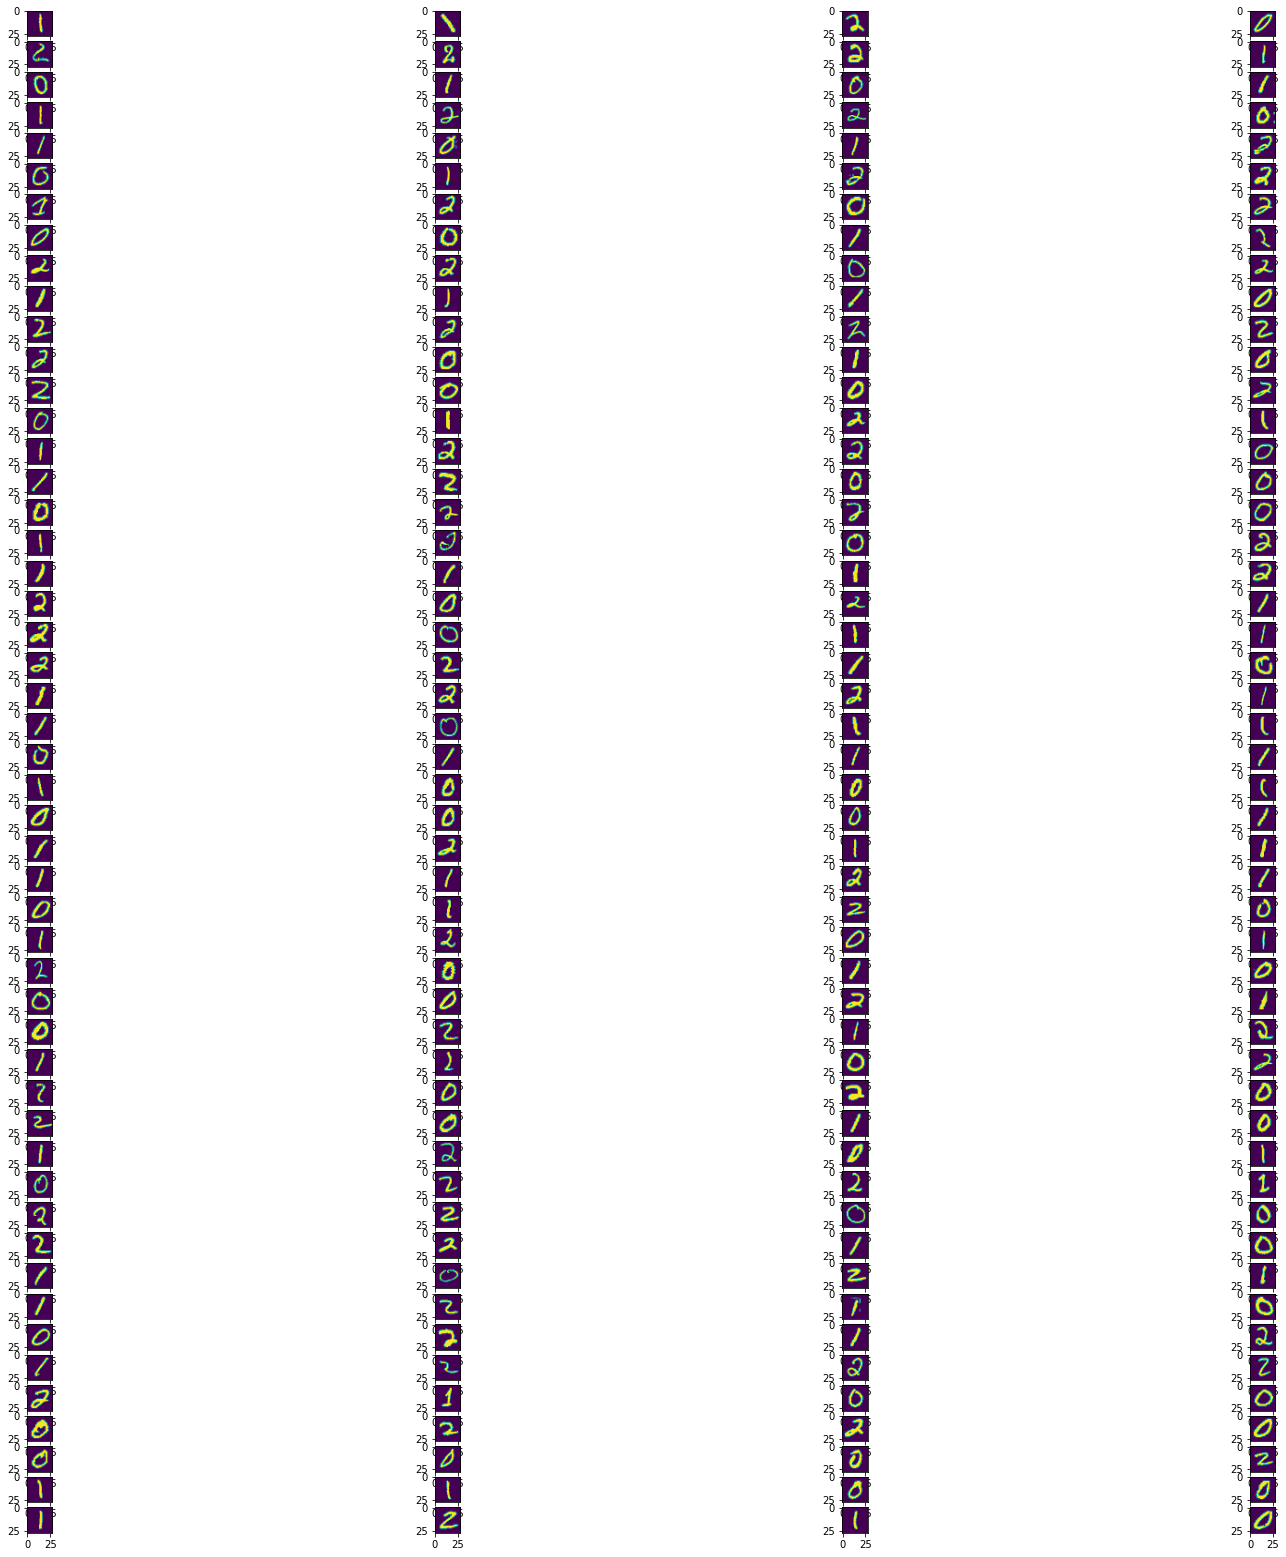

In [ ]:
#visualize input train data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(28, 28))
columns = 4
rows = 50
for i in range(0, columns*rows):
    img = x_train[i][0]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

In [ ]:
#visualize input test data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(28, 28))
columns = 4
rows = 50
for i in range(0, columns*rows):
    img = x_test[i][0]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

In [ ]:
# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    MaxPoolingLayer((5,26,26),2, 2),
    Convolutional((5,13,13), 3, 5),
    Sigmoid(),
    Reshape((5, 11, 11), (5 * 11 * 11, 1)),
    FCLayer(5 * 11 * 11, 100),
    Sigmoid(),
    FCLayer(100, 3),
    Softmax()
]

In [ ]:
# neural network
network1 = [
    CNNLayer((1, 28, 28), 3, 5),
    Sigmoid(),
    MaxPoolingLayer((5,26,26),2, 2),
    CNNLayer((5,13,13), 3, 5),
    Sigmoid(),
    Reshape((5, 11, 11), (5 * 11 * 11, 1)),
    FCLayer(5 * 11 * 11, 100),
    Sigmoid(),
    FCLayer(100, 3),
    Softmax()
]

In [ ]:
%%time
# train with CNN use scipy -> signal.correlate2D
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=20,
    learning_rate=0.1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


1/20, error=0.5554498024059069
2/20, error=0.26303832262559546
3/20, error=0.25750656748095113
4/20, error=0.19396973244533086
5/20, error=0.19152873365186085
6/20, error=0.24025231226180074
7/20, error=0.16143061236835682
8/20, error=0.1758910578183987
9/20, error=0.1507028236618987
10/20, error=0.15016185346799601
11/20, error=0.150990366952705
12/20, error=0.0983478760519874
13/20, error=0.07529550534368808
14/20, error=0.11790877663140988
15/20, error=0.12470964794133342
16/20, error=0.11656081565249131
17/20, error=0.13636940528392527
18/20, error=0.11067866310114795
19/20, error=0.11676476048255104
20/20, error=0.10271669546722852
CPU times: user 4min 6s, sys: 3min 14s, total: 7min 20s
Wall time: 3min 54s


In [ ]:
# test with network
true_label = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")
    if np.argmax(output) == np.argmax(y):
      true_label += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 2, true: 0
pred: 0, true: 0
pred: 2, true: 2
pred: 2, true: 2
pred: 1, true: 1
pred: 1, true: 1
pred: 2, true: 2
pred: 2, true: 2
pred: 2, true: 2
pred: 2, true: 2
pred: 2, true: 2
pred: 0, true: 0
pred: 2, true: 0
pred: 0, true: 0
pred: 2, true: 2
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 2, true: 2
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 2, true: 2
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 2, true: 2
pred: 2, true: 0
pred: 2, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 2, true: 2
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 2, true: 0
pred: 1, true: 1
pred: 2, true: 2
pred: 2, true: 0
pred: 2, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 2, true: 2
pred: 1, true: 1
pred: 2, true: 2
pred: 1, true: 1
pred: 2, true: 2
pred: 0, true: 0
pred: 2, true: 2
pred: 2, true: 2
pred: 2, true:

In [ ]:
#Score:
print(f"Score: {true_label/len(x_test)} on predict true:{true_label} vs true:{len(x_test)}")

Score: 0.89 on predict true:267 vs true:300


In [ ]:
%%time
# train with CNN use hand made correlate function
train(
    network1,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=20,
    learning_rate=0.1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


1/20, error=0.6095359779156552
2/20, error=0.3080023977088344
3/20, error=0.2582179453497794
4/20, error=0.25505663035017695
5/20, error=0.26516991684175245
6/20, error=0.2604317246409546
7/20, error=0.21320974675284088
8/20, error=0.2082270310290469
9/20, error=0.1694102610473693
10/20, error=0.16070601854599018
11/20, error=0.23373367209725487
12/20, error=0.2373114328838347
13/20, error=0.1420370876112624
14/20, error=0.19144833063687164
15/20, error=0.18013350187389118
16/20, error=0.19384033314283627
17/20, error=0.2800092238745408
18/20, error=0.12392636887103951
19/20, error=0.18515812628047978
20/20, error=0.2626635440958083
CPU times: user 19min 36s, sys: 10min 21s, total: 29min 57s
Wall time: 18min 34s


In [ ]:
# test with network1
true_label = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")
    if np.argmax(output) == np.argmax(y):
      true_label += 1

pred: 1, true: 1
pred: 1, true: 1
pred: 2, true: 2
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


pred: 0, true: 0
pred: 0, true: 0
pred: 2, true: 0
pred: 2, true: 2
pred: 2, true: 2
pred: 2, true: 0
pred: 2, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 2, true: 2
pred: 2, true: 2
pred: 1, true: 1
pred: 0, true: 0
pred: 2, true: 2
pred: 2, true: 2
pred: 2, true: 2
pred: 2, true: 2
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 2, true: 2
pred: 1, true: 1
pred: 0, true: 0
pred: 2, true: 2
pred: 1, true: 1
pred: 1, true: 1
pred: 2, true: 2
pred: 0, true: 0
pred: 2, true: 2
pred: 2, true: 0
pred: 2, true: 2
pred: 2, true: 2
pred: 1, true: 1
pred: 2, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 2, true: 2
pred: 0, true: 0
pred: 1, true: 1
pred: 2, true: 0
pred: 2, true: 2
pred: 2, true: 2
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 2, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 2, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true:

In [ ]:
#Score:
print(f"Score: {true_label/len(x_test)} on predict true:{true_label} vs true:{len(x_test)}")

Score: 0.9266666666666666 on predict true:278 vs true:300


## Cài đặt song song

# Tài liệu tham khảo


https://pavisj.medium.com/convolutions-and-backpropagations-46026a8f5d2c

https://medium.com/analytics-vidhya/convolutional-neural-networks-and-backpropagation-using-numpy-4da2c9d14fdd

https://www.linkedin.com/pulse/forward-back-propagation-over-cnn-code-from-scratch-coy-ulloa/

https://towardsdatascience.com/lets-code-convolutional-neural-network-in-plain-numpy-ce48e732f5d5

https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e